In [2]:
import altair as alt

# saving data into a file rather than embedding into the chart
# alt.data_transformers.enable('json') 
# alt.data_transformers.enable('data_server')
alt.data_transformers.enable('default',max_rows=50000)
alt.renderers.enable('notebook',embed_options={'renderer': 'svg'})
# alt.renderers.enable('jupyterlab')
from vega_datasets import data
import pandas as pd
from altair import Scale,Color

In [3]:
file = 'regions.csv'
regions = pd.read_csv(file,header=0)

In [4]:
file = 'annual_county_level.csv'
dforg = pd.read_csv(file,header=0)
dforg = dforg.drop(['Unnamed: 0'],axis=1)

In [5]:
fdf = pd.merge(dforg,regions,on='fips',how='left')

In [6]:
len(fdf)==len(dforg)

True

In [7]:
fdf1 = fdf.copy()

In [8]:
fdf1.columns

Index(['state', 'fips', 'year', 'BUYER_COUNTY', 'pills', 'population',
       'Pill_per_pop', 'Census Region', 'Census Division', 'State', 'County'],
      dtype='object')

In [9]:
data = fdf1.groupby(['year','Census Region']).mean()
print(data.columns)
data.head()

Index(['fips', 'pills', 'population', 'Pill_per_pop'], dtype='object')


fips         pills     population  Pill_per_pop
year Census Region                                                         
2006 Midwest        28653.079920  1.684714e+06   65803.643357     23.418354
     Northeast      35988.990783  5.608463e+06  251256.493088     24.779349
     South          31785.736383  2.540998e+06   79063.499637     33.651773
     West           25892.946472  4.801408e+06  167044.895377     29.769346
2007 Midwest        28656.257485  1.929847e+06   65999.206587     26.735166

In [10]:
data=data.reset_index()

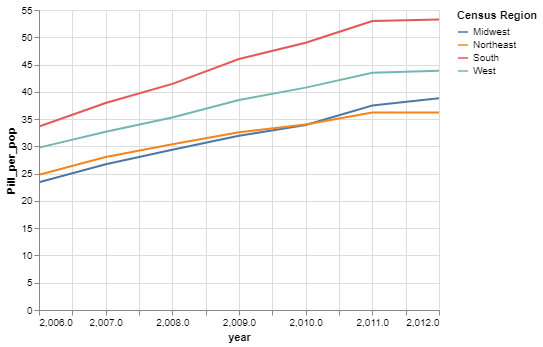

In [11]:
alt.Chart(data).mark_line().encode(
    x='year',
    y='Pill_per_pop',
    color='Census Region'
).interactive()

In [12]:
data1=data.copy()
data1['year']=data1['year'].astype(str)

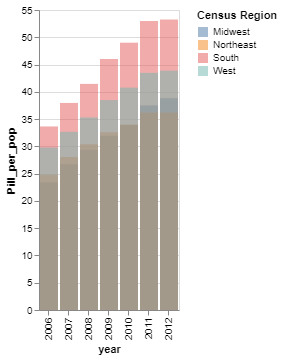

In [13]:
alt.Chart(data1).mark_bar(opacity=0.5).encode(
    x='year:O',
    y=alt.Y('Pill_per_pop:Q', stack=None),
    color="Census Region")

In [14]:
data1[data1['Census Region']=='Midwest']

,year,Census Region,fips,pills,population,Pill_per_pop
0,2006,Midwest,28653.079920,1.684714e+06,65803.643357,23.418354
4,2007,Midwest,28656.257485,1.929847e+06,65999.206587,26.735166
8,2008,Midwest,28681.719281,2.119138e+06,66293.988012,29.372348
12,2009,Midwest,28691.436000,2.286490e+06,66167.552000,31.944406
16,2010,Midwest,28702.023023,2.483047e+06,66405.723724,33.926135
20,2011,Midwest,28691.695912,2.705841e+06,66387.226321,37.506814
24,2012,Midwest,28683.654726,2.761685e+06,66460.581095,38.828978


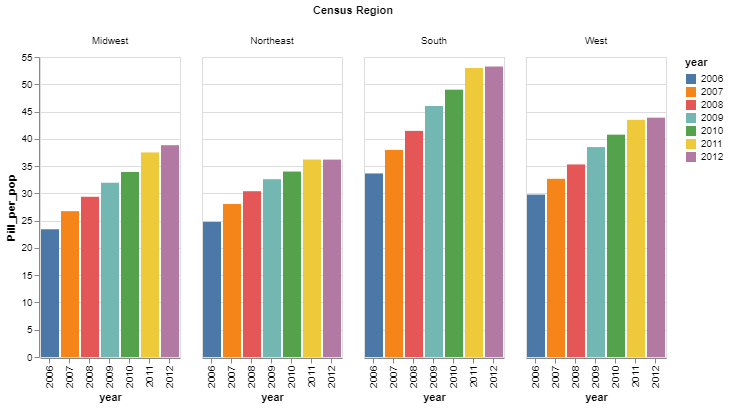

In [15]:
alt.Chart(data1).mark_bar().encode(
    x='year:O',
    y='Pill_per_pop:Q',
    color='year:N',
    column='Census Region:N'
)

alt.Chart(data1).mark_bar().encode(
    x='year:O',
    y='Pill_per_pop:Q',
    color='year:N',
    column='Census Region:N'
)

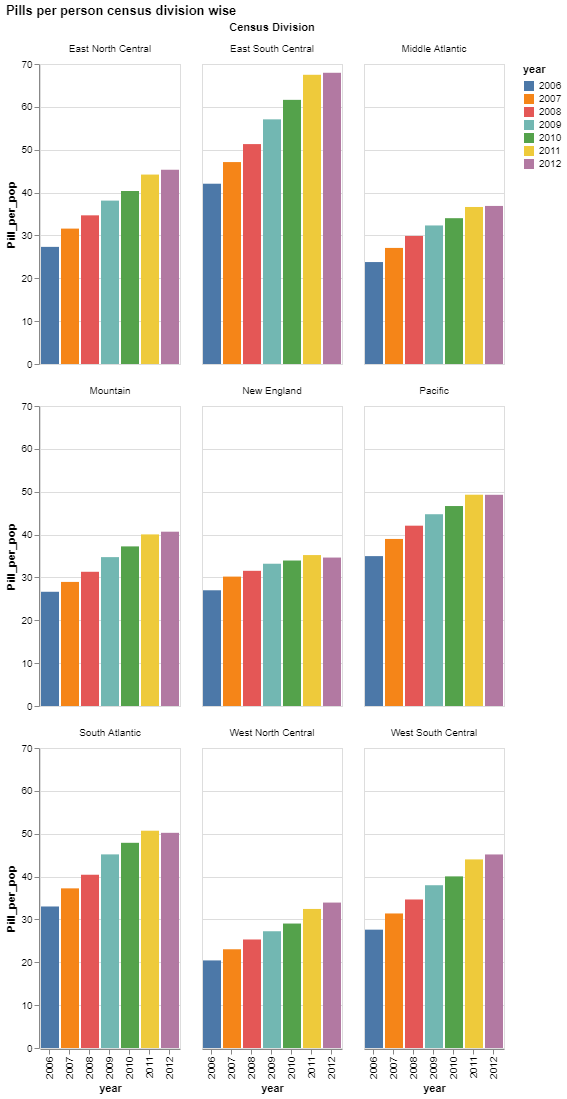

In [16]:
data2 = fdf1.groupby(['year','Census Division']).mean()
data2 = data2.reset_index()
data2['year'] = data2['year'].astype(str)

alt.Chart(data2).mark_bar().encode(
    x='year:O',
    y='Pill_per_pop:Q',
    color='year:N',
#     column='Census Division:N'
    facet = 'Census Division'
).properties(
    title='Pills per person census division wise',
    columns=3
)

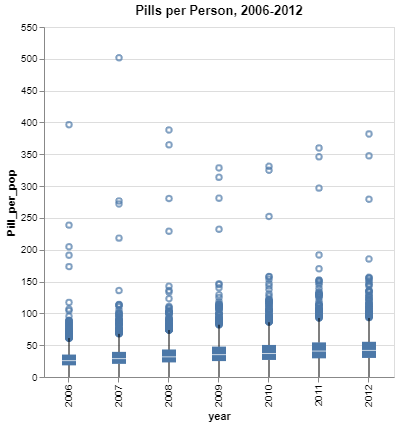

In [17]:
data2 = fdf1.groupby(['year','County']).mean()
data2 = data2.reset_index()
data2['year'] = data2['year'].astype(str)

alt.Chart(data2).mark_bar().encode(
    x='year:O',
    y='Pill_per_pop:Q',
    color='year:N',
    column='Census Division:N'
#     facet = 'Census Division'
).properties(
    title='Pills per person census division wise',
)

alt.Chart(data2).mark_boxplot().encode(
    x='year:N',
    y='Pill_per_pop:Q'
).properties(title='Pills per Person, 2006-2012',height=350,width=350)

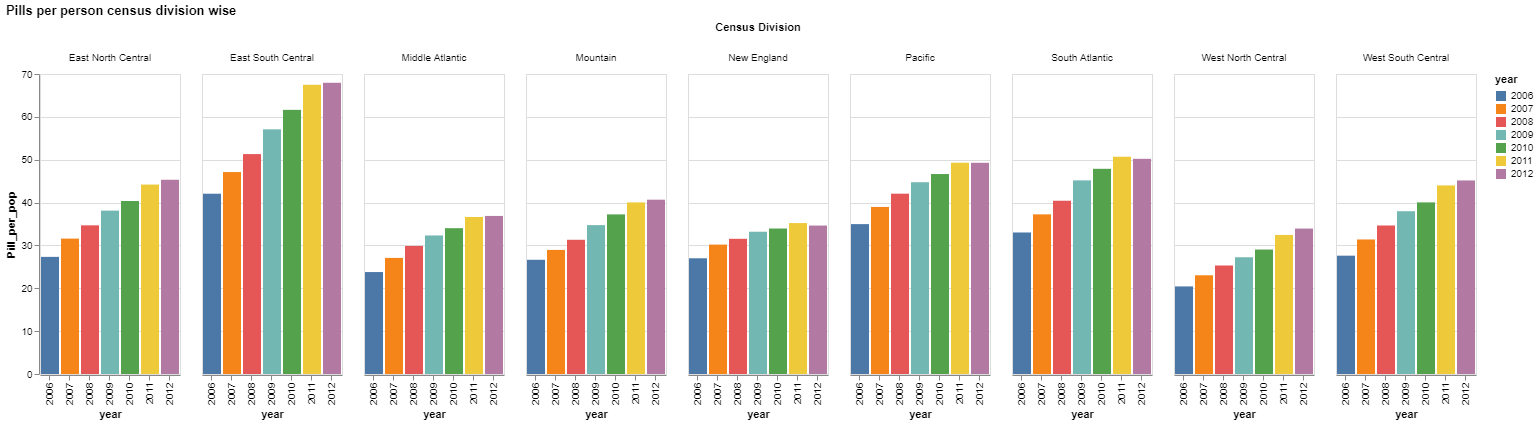

In [21]:
data2 = fdf1.groupby(['year','Census Division']).mean()
data2 = data2.reset_index()
data2['year'] = data2['year'].astype(str)

alt.Chart(data2).mark_bar().encode(
    x='year:O',
    y='Pill_per_pop:Q',
    color='year:N',
    column='Census Division:N'
#     facet = 'Census Division'
).properties(
    title='Pills per person census division wise',
)

In [22]:
alt.Chart(data2).mark_bar().encode(
    x='year:O',
    y='Pill_per_pop:Q',
    color='year:N',
    column='Census Division:N'
#     facet = 'Census Division'
).properties(
    title='Pills per person census division wise',
).save('a.html')

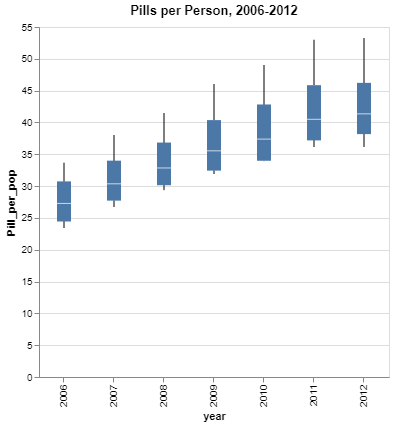

In [25]:
alt.Chart(data1).mark_boxplot().encode(
    x='year:N',
    y='Pill_per_pop:Q'
).properties(title='Pills per Person, 2006-2012',height=350,width=350)

# Deaths

In [26]:
dforg = pd.read_csv('dd.tsv',sep='\t')

In [27]:
dforg['deaths_per_100k']= 100000*dforg['Deaths']/dforg['Population']
dforg.dtypes

Year                 int64
Year Code            int64
State               object
State Code           int64
County              object
County Code          int64
Race                object
Race Code           object
Gender              object
Gender Code         object
Deaths               int64
Population           int64
Crude Rate          object
deaths_per_100k    float64
dtype: object

In [28]:
dforg['Year'] = dforg['Year'].astype(str)

In [29]:
dforg.head()

,Year,Year Code,State,State Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate,deaths_per_100k
NaN,2006,2006,Alabama,1,"Jefferson County, AL",1073,White,2106-3,Female,F,10,191391,Unreliable,5.224906
NaN,2006,2006,Arizona,4,"Maricopa County, AZ",4013,White,2106-3,Female,F,53,1618323,3.3,3.274995
NaN,2006,2006,Arizona,4,"Maricopa County, AZ",4013,White,2106-3,Male,M,65,1604241,4.1,4.051760
NaN,2006,2006,Arizona,4,"Pima County, AZ",4019,White,2106-3,Female,F,13,425669,Unreliable,3.054016
NaN,2006,2006,Arizona,4,"Pima County, AZ",4019,White,2106-3,Male,M,20,408980,4.9,4.890215


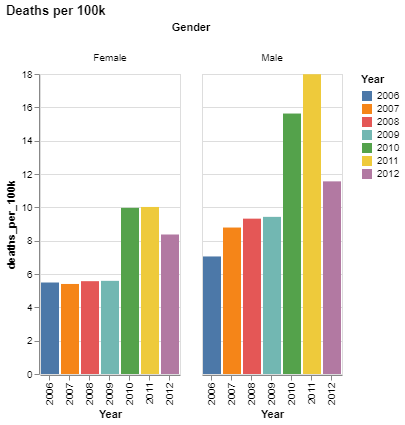

In [30]:
data3 = dforg.groupby(['Year','Gender']).mean()
data3 = data3.reset_index()
data3['Year'] = data3['Year'].astype(str)

alt.Chart(data3).mark_bar().encode(
    x='Year:O',
    y='deaths_per_100k:Q',
    color='Year:N',
    column='Gender:N'
#     facet = 'Census Division'
).properties(
    title='Deaths per 100k',
)

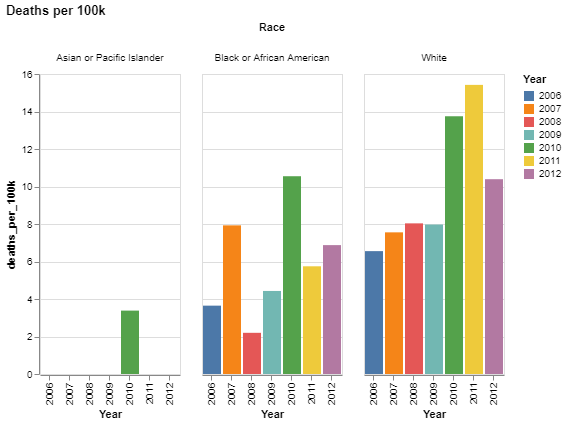

In [33]:
data3 = dforg.groupby(['Year','Race']).mean()
data3 = data3.reset_index()
data3['Year'] = data3['Year'].astype(str)

alt.Chart(data3).mark_bar().encode(
    x='Year:O',
    y='deaths_per_100k:Q',
    color='Year:N',
    column='Race:N'
#     facet = 'Census Division'
).properties(
    title='Deaths per 100k',
)

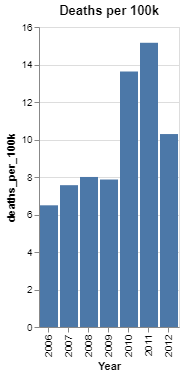

In [31]:
data4 = dforg.groupby(['Year']).mean()
data4 = data4.reset_index()
data4['Year'] = data4['Year'].astype(str)

alt.Chart(data4).mark_bar().encode(
    x='Year:O',
    y='deaths_per_100k:Q',
#     facet = 'Census Division'
).properties(
    title='Deaths per 100k',
)